 # Hydropower in New England
 Mapping all existing hydropower assets in New England (as of 2021), sized by average annual net hydropower generation (measured in megawatt hours). Also mapped are New England streams, an important water source for many of the plants. 
    
    
- Hydropower Plant data from Oak Ridge National Laboraty [here](https://hydrosource.ornl.gov/dataset/EHA2021)
- Stream data via the EPA's National Hydrology Dataset [here](https://www.epa.gov/waterdata/get-nhdplus-national-hydrography-dataset-plus-data)
- States data via Census Bureau's TIGER database [here](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

Data accessed December 2022

Notebooks & Map produced December 2022 by Michael Sparks, New Maps Plus @ Kentucky



In [1]:
#import standard libraries

%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

/var/folders/3d/xl1b_ttn5s158zslb6ql0lch0000gp/T/ipykernel_9347/3069463207.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


### Section 1:
- Import and clean data
- (From experimenting beforehand, we know the data is already cleaned)

In [2]:
#import data
plants = gpd.read_file('data/plants')
water = gpd.read_file('data/water')
states = gpd.read_file('data/states')

In [3]:
plants.head()

,EHA_PID,PtName,County,State,Pt_Own,OwType,Dam_Own,Type,EIA_PID,FC_Dock,...,PS_OpYr,Water,HUC,NID_ID,REDSPCA,NERC,BACode,Sector,Trans,geometry
0,hc1428_p01,Squa Pan Hydro Station,Aroostook,ME,WPS New England Generation Inc,Wholesale Power Marketer,WPS New England Generation Inc,HY,1516.0,P-2368,...,NaN,Squa Pan Stream,10100040901,ME00234,134.0,NPCC,NBSO,IPP Non-CHP,Emera Maine,POINT (-68.32570 46.55630)
1,hc1427_p01,Caribou Generation Station,Aroostook,ME,WPS New England Generation Inc,Wholesale Power Marketer,WPS New England Generation Inc,HY,1513.0,P-2367,...,NaN,Aroostook River,10100041009,ME00227,134.0,NPCC,NBSO,IPP Non-CHP,Emera Maine,POINT (-68.00220 46.84880)
2,hc1497_p01,McKay,Piscataquis,ME,Great Lakes Hydro America LLC,Wholesale Power Marketer,Great Lakes Hydro America LLC,HY,54134.0,P-2572,...,NaN,West Branch Penobscot River,10200010509,ME00204,134.0,NPCC,ISNE,IPP Non-CHP,Emera Maine,POINT (-69.17670 45.88150)
3,hc1495_p01,North Twin,Penobscot,ME,Great Lakes Hydro America LLC,Wholesale Power Marketer,Great Lakes Hydro America LLC,HY,54134.0,P-2458,...,NaN,West Branch Penobscot River,10200010905,ME00203,134.0,NPCC,ISNE,IPP Non-CHP,Emera Maine,POINT (-68.78130 45.63460)
4,hc1494_p01,Millinocket,Penobscot,ME,Great Lakes Hydro America LLC,Wholesale Power Marketer,Great Lakes Hydro America LLC,HY,54134.0,P-2458,...,NaN,West Branch Penobscot River,10200010907,ME00202,134.0,NPCC,ISNE,IPP Non-CHP,Emera Maine,POINT (-68.73000 45.63740)


In [4]:
water.head()

,OBJECTID_1,OBJECTID,HUC_8,HUC_10,HUC_12,ACRES,NCONTRB_A,HU_10_GNIS,HU_12_GNIS,HU_10_DS,...,META_ID,STATES,GlobalID,SHAPE_Leng,GAZ_ID,WBD_Date,VPUID,Shape_Area,AreaHUC12,geometry
0,1,15772,04100003,0410000307,041000030706,20616.334079,0.0,None,None,0410000308,...,IN01,IN,{EBB80593-229C-4050-BF61-5409260D7624},0.689156,-1074,2010-08-31,04,0.008963,83.431344,"POLYGON ((-85.18915 41.26769, -85.18815 41.267..."
1,2,15807,04050001,0405000116,040500011602,11804.047008,0.0,None,None,0405000118,...,IN01,IN,{C3509DFA-C96B-44CB-8CAB-B9DC4B839DCF},0.518648,-1075,2010-08-31,04,0.005136,47.769283,"POLYGON ((-85.50125 41.34290, -85.49983 41.342..."
2,3,15817,04100003,0410000307,041000030704,15716.148880,0.0,None,None,0410000308,...,IN01,IN,{E080FBDA-0976-41FD-A146-EE88FF18E8EE},0.595403,-1076,2010-08-31,04,0.006839,63.600998,"POLYGON ((-85.13571 41.28638, -85.13561 41.286..."
3,4,15835,04100003,0410000307,041000030705,15051.738648,0.0,None,None,0410000308,...,IN01,IN,{773FDC3B-F5C8-4A40-BF71-64A07BB54853},0.677857,-1077,2010-08-31,04,0.006551,60.912225,"POLYGON ((-85.13881 41.34829, -85.13888 41.348..."
4,5,15842,04050001,0405000116,040500011604,10530.968422,0.0,None,None,0405000118,...,IN01,IN,{508222B6-B812-4443-8A32-E13412DD3CCF},0.530968,-1078,2010-08-31,04,0.004585,42.617317,"POLYGON ((-85.38403 41.35776, -85.38474 41.358..."


In [5]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,56,01779807,0400000US56,56,WY,Wyoming,00,251458712294,1867503716,"POLYGON ((-111.05456 45.00095, -111.04507 45.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478942847588,245378425142,"MULTIPOLYGON (((179.48246 51.98283, 179.48657 ..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ..."
3,60,01802701,0400000US60,60,AS,American Samoa,00,197759069,1307243751,"MULTIPOLYGON (((-168.14582 -14.54791, -168.145..."
4,05,00068085,0400000US05,05,AR,Arkansas,00,134660767709,3121950081,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."


### Section 2:
- Filter data to New England
- Make sure data *looks* as expected

In [6]:
#filter to only new england states
ne_states = ["ME", "VT", "NH", "MA", "CT", "RI"]

ne = states[states.STUSPS.isin(ne_states)]

<AxesSubplot: >

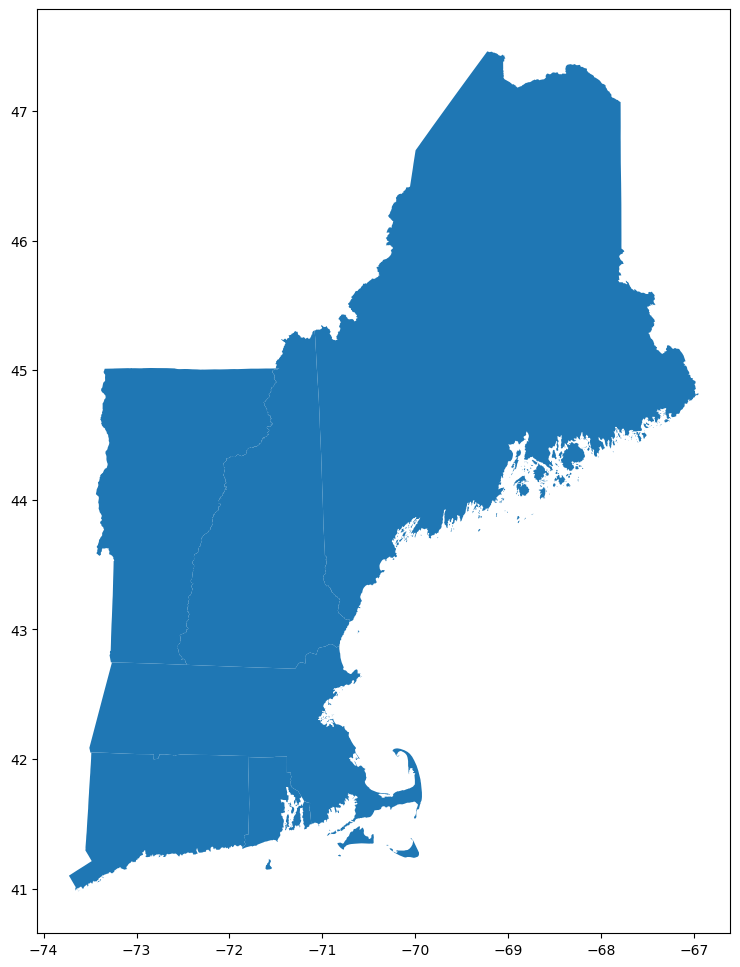

In [7]:
ne.plot()

In [8]:
#create polygon that we'll use to clip plants & streams
ne_poly = ne.geometry.unary_union

In [9]:
ne_plants = plants[plants.geometry.intersects(ne_poly)]

<AxesSubplot: >

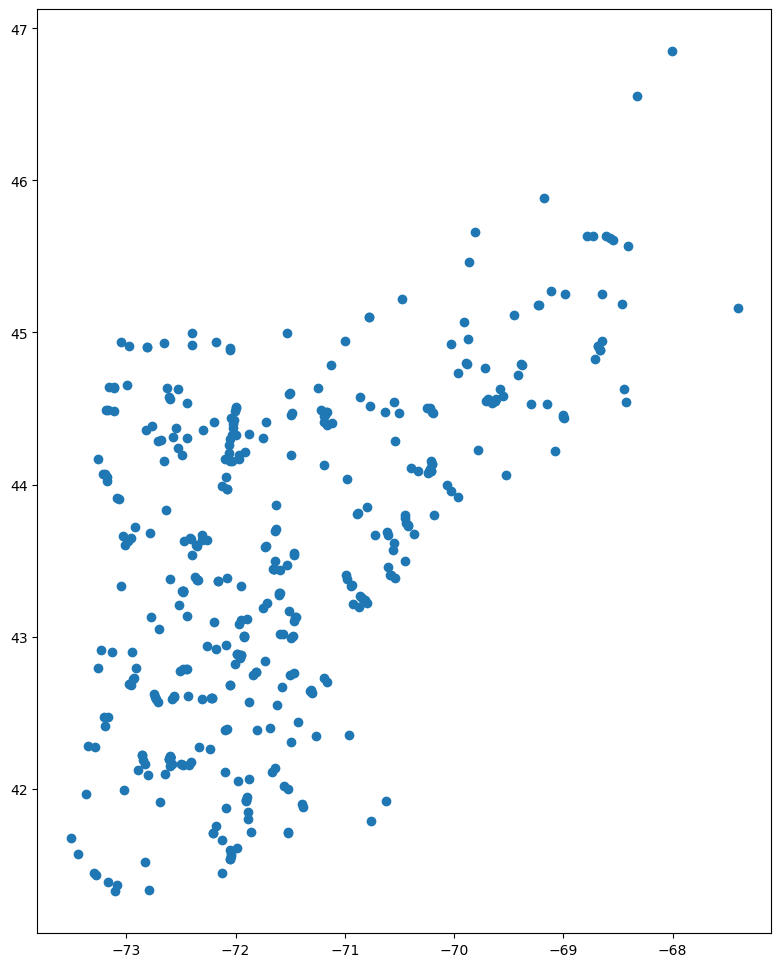

In [10]:
#lookin good!
ne_plants.plot()

In [11]:
#filter streams data to just new england
ne_water = water[water.STATES.isin(ne_states)]

In [12]:
#then use the ne england polygon to clip the stream lines
ne_water = water[water.geometry.intersects(ne_poly)]

/Users/Sparks/miniconda3/envs/esda/lib/python3.10/site-packages/pygeos/predicates.py:764: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


<AxesSubplot: >

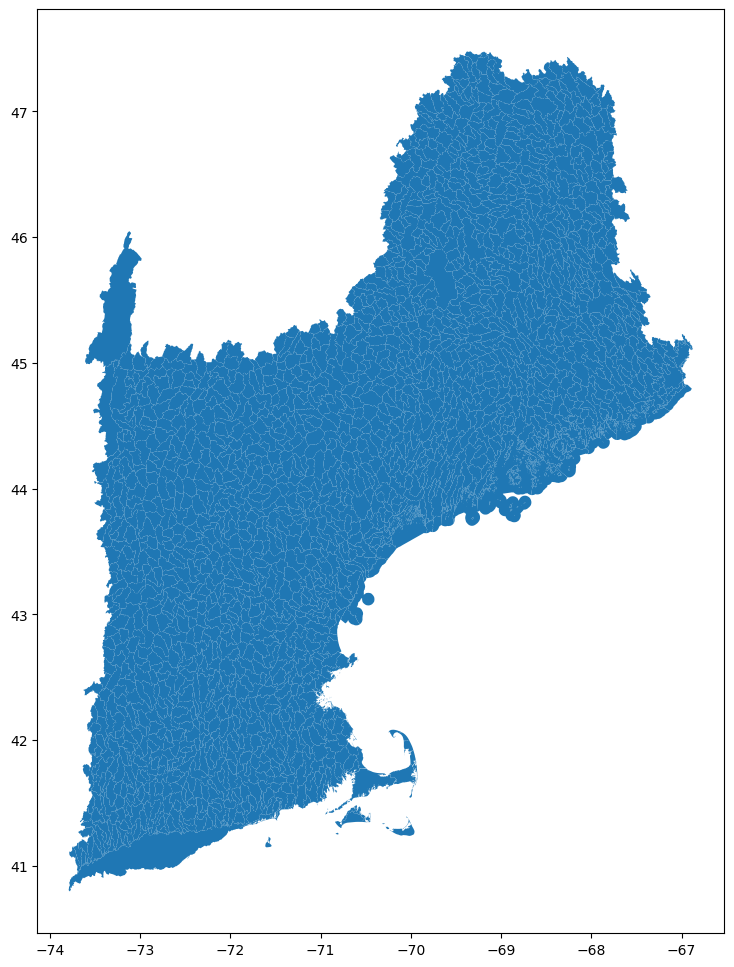

In [13]:
ne_water.plot()

### Section 3: Chart the data

I've previously experimented with several different styling ideas (and removed the ones that didn't work)

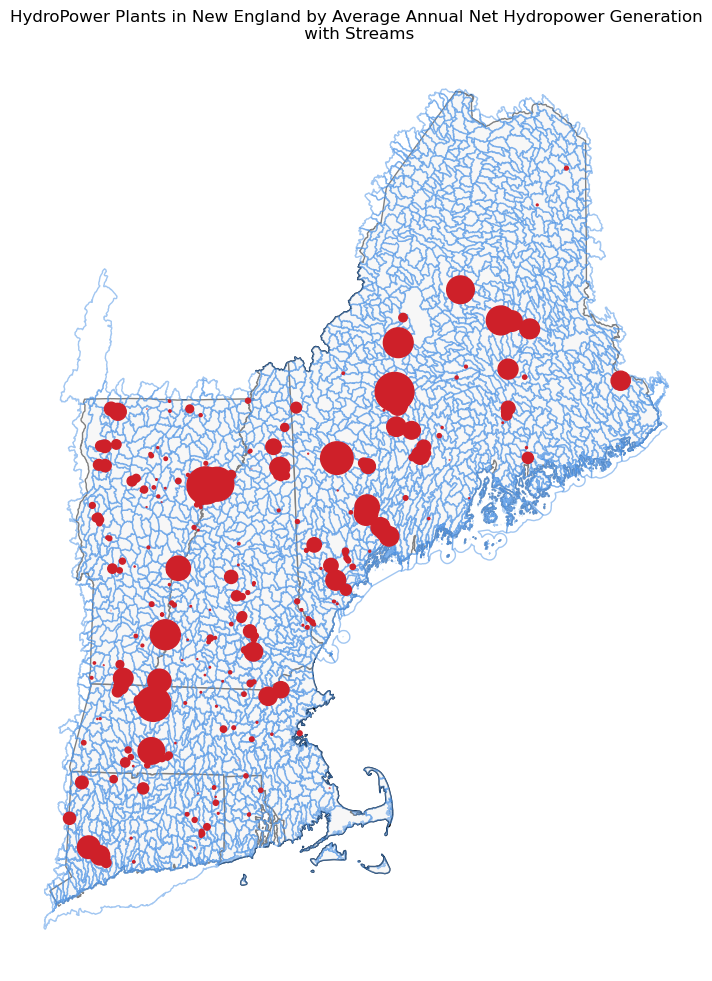

In [14]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#ce2029'
line_color = '#448ee4'


ne.plot(ax=ax, color=base_color, edgecolor='black', lw=1, zorder=0)
ne_plants.plot(ax=ax, color=marker_color, markersize=ne_plants['CH_MWh']/500, zorder=2)
ne_water.plot(ax=ax, edgecolor='#448ee4', color='white', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.title('HydroPower Plants in New England by Average Annual Net Hydropower Generation\n with Streams');


plt.savefig('ne-hydro.png')


### Section 4: Download data & make useable in web map

Now that we now we can produce a high-quality, visually pleasing, informative map of hydropower in New England, we'll download the processed data in geoJSON files that we can then use in a web environment. 



In [15]:
ne.to_file('/Users/Sparks/Documents/nmp/map674/map674-module-07-michael-sparks13/newengland-hydropower/map/data/ne_states.geojson')
ne_plants.to_file('/Users/Sparks/Documents/nmp/map674/map674-module-07-michael-sparks13/newengland-hydropower/map/data/ne_plants.geojson')
ne_water.to_file('/Users/Sparks/Documents/nmp/map674/map674-module-07-michael-sparks13/newengland-hydropower/map/data/ne_water.geojson')